## **Author: Asad Tariq Sheikh**

## **Task: Titanic Survical Prediction**

(Level - Beginner)

Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.

The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

This is a simple logistic regression task.

Dataset: https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/titanic.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# pd.set_option('display.max_rows', None)

# **Importing CSV**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/asadsheikh1/MachineLearningPredictions/main/titanic.csv')

# **Reading CSV**

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Analyzing Data**

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Plotting:**

**1. Heatmap**

**2. Histogram**

**3. Countplot**

<Axes: >

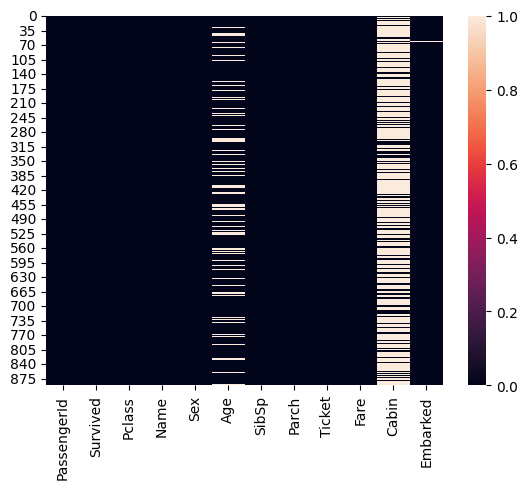

In [9]:
sns.heatmap(data.isnull())

<Axes: xlabel='Age', ylabel='Count'>

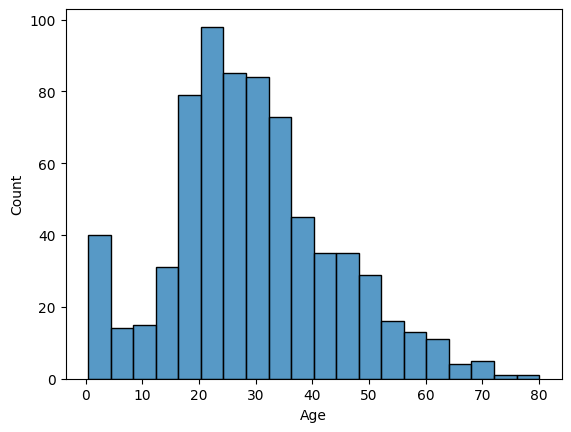

In [10]:
sns.histplot(data , x = 'Age')

<Axes: ylabel='Frequency'>

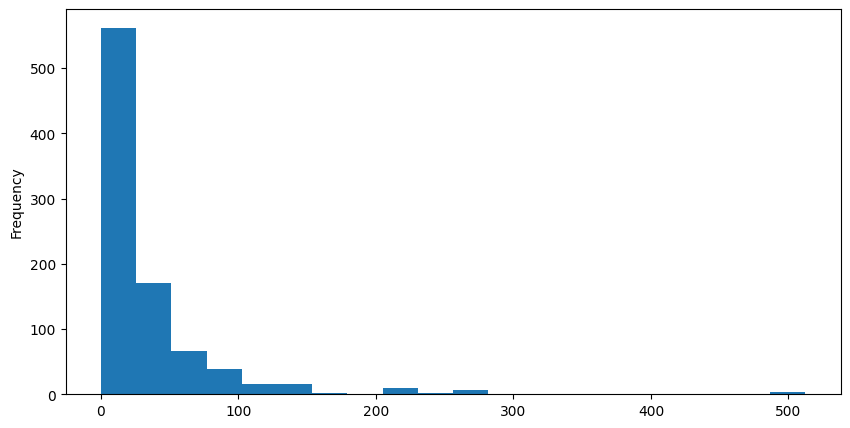

In [11]:
data['Fare'].plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='Survived', ylabel='count'>

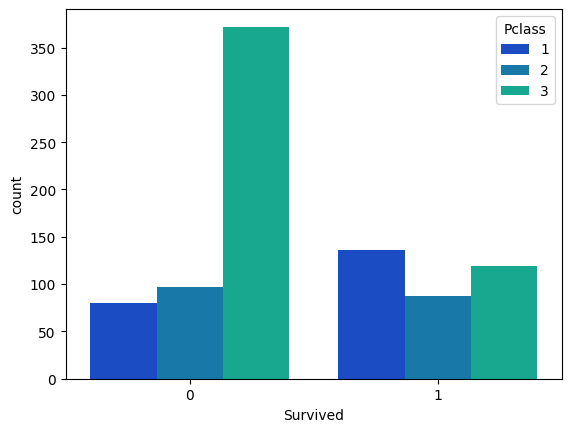

In [12]:
sns.countplot(data , x = 'Survived' , hue = 'Pclass' , palette = 'winter')

<Axes: xlabel='Sex', ylabel='count'>

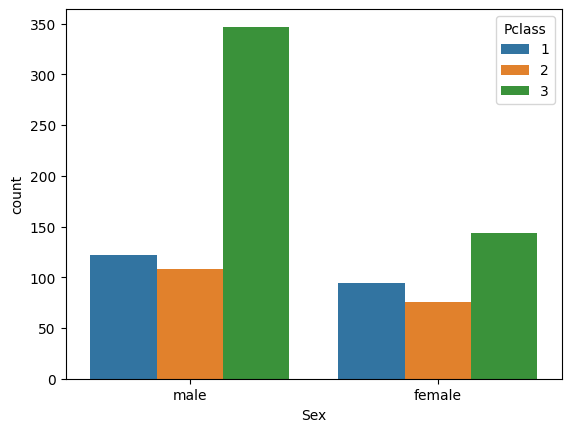

In [13]:
sns.countplot(data , x = 'Sex' , hue = 'Pclass')

<Axes: xlabel='Survived', ylabel='count'>

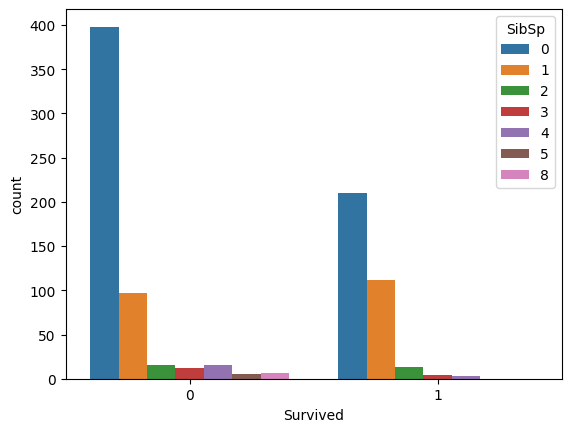

In [14]:
sns.countplot(data , x = 'Survived' , hue = 'SibSp')

<Axes: xlabel='SibSp', ylabel='count'>

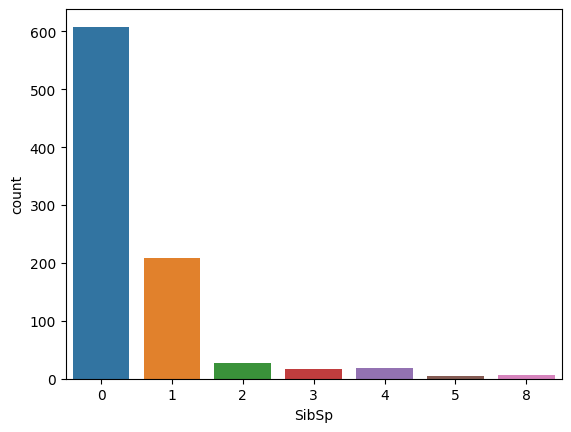

In [15]:
sns.countplot(data , x = 'SibSp')

# **Data Cleaning**

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
data = data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


# **Converting categorical variable to numeric variable**

In [18]:
data.Sex = (data['Sex'] == 'male' ).astype(int)

In [19]:
embarked = {
    'Embarked': {'Q': 0, 'S': 1, 'C': 2}
}
data = data.replace(embarked)

In [20]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0
887,1,1,0,19.0,0,0,30.0000,1.0
888,0,3,0,NaN,1,2,23.4500,1.0
889,1,1,1,26.0,0,0,30.0000,2.0


In [21]:
data['Age'].mean()

29.69911764705882

In [22]:
data['Fare'].mean()

32.204207968574636

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 55.8 KB


### **We can observe that all the values have been successfully converted to numerical format**

In [28]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0
887,1,1,0,19.0,0,0,30.0000,1.0
888,0,3,0,NaN,1,2,23.4500,1.0
889,1,1,1,26.0,0,0,30.0000,2.0


# **Filling null values with mean using `fillna()`**

In [29]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [30]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

In [31]:
data['Embarked'].fillna(data.Embarked.mean(), inplace = True)

# **Scaling Data**

In [32]:
numerical_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

scaler = MinMaxScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

### **This is how the StandardScaler works**

In [33]:
result = (data['Fare'][0] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())
result
# 0.014151

0.014151057562208049

In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.5
1,1,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0
2,1,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.5
3,1,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.5
4,0,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.5
...,...,...,...,...,...,...,...,...
886,0,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.5
887,1,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.5
888,0,1.0,0.0,0.367921,0.125,0.333333,0.045771,0.5
889,1,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0


# **Algorithm**

# **Logistic Regression**

In [35]:
log_reg = LogisticRegression()

In [36]:
X = data.drop('Survived' , axis = 1)
Y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 20, shuffle = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.5
1,1,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0
2,1,1.0,0.0,0.321438,0.000,0.0,0.015469,0.5
3,1,0.0,0.0,0.434531,0.125,0.0,0.103644,0.5
4,0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.5


In [37]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Prediction**

In [38]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [39]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0])

# **Metrics**

In [40]:
confusion_matrix = confusion_matrix(y_pred, Y_test)
confusion_matrix

array([[123,  23],
       [ 19,  58]])

<Axes: >

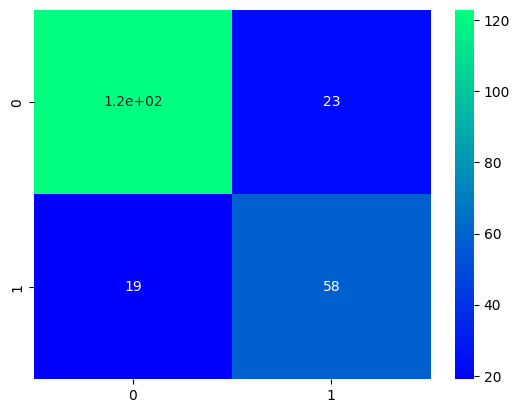

In [41]:
sns.heatmap(confusion_matrix, annot=True, cmap='winter')

In [42]:
accuracy = (confusion_matrix.diagonal().sum()) / (confusion_matrix.sum())
print(f'Accuracy: {accuracy}')

Accuracy: 0.8116591928251121
